https://www.youtube.com/watch?v=QW4yBncRBlU&list=PL9mhQYIlKEhcL3_nJMYx9u-nY2TggZJ0Z&index=3

In [3]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
data = boston.data
label = boston.target
columns = boston.feature_names

data = pd.DataFrame(data=data, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
data.shape

(506, 13)

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


# 1. Simple Linear Regression

sklearn의 model_selection 패키지에 있는 train_test_split 함수를 사용합니다.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

## 1) 모델 불러오기

In [18]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

## 2) 모델 학습하기

In [36]:
sim_lr.fit(x_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3) 결과 예측하기

In [39]:
y_pred = sim_lr.predict(x_test['RM'].values.reshape((-1,1)))

## 4) 결과 살펴보기

In [44]:
from sklearn.metrics import r2_score

In [45]:
print(f'단순 선형 회귀, R2 : {r2_score(y_test, y_pred):.4f}')

단순 선형 회귀, R2 : 0.1795


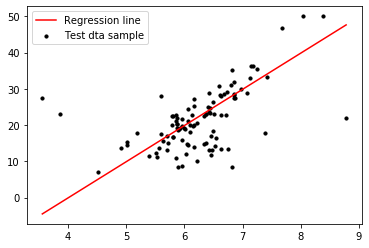

In [46]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(x_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test dta sample'], loc='upper left')

In [47]:
print(f'w:{sim_lr.coef_[0]:.4f}, b:{sim_lr.intercept_:.4f}')

w:9.9900, b:-40.0941


# 2. Multiple Linear Regression

In [49]:
mul_lr = LinearRegression()
mul_lr.fit(x_train, y_train)
y_pred = mul_lr.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
print(f'단순 선형 회귀, R2 : {r2_score(y_test, y_pred):.4f}')

단순 선형 회귀, R2 : 0.6174


In [55]:
print(f'w:{mul_lr.coef_}, b:{mul_lr.intercept_:.4f}')

w:[-1.39521123e-01  4.17817156e-02 -4.57312740e-03  3.78506106e+00
 -1.46255552e+01  4.52548061e+00  1.49683102e-04 -1.38217694e+00
  2.78132923e-01 -1.03183306e-02 -8.42539713e-01  1.05460752e-02
 -5.19900681e-01], b:27.2753
